In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [5]:
df=pd.read_csv('Salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [8]:
df.sample(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
236,Prof,A,25,25,Male,114000
380,AsstProf,A,8,3,Male,75996
103,Prof,B,20,14,Female,127512
80,Prof,B,43,28,Male,150743
51,Prof,B,12,11,Male,108875


In [9]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [10]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [11]:
df.shape

(397, 6)

In [12]:
#checking null value
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:>

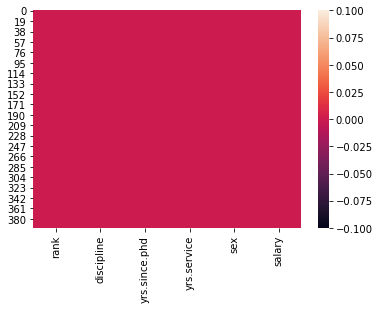

In [13]:
sns.heatmap(df.isnull())

no diffrent colour it means no null value, since there are no null value then we can proceed

In [14]:
df["rank"].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [15]:
df["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
df["discipline"].unique()

array(['B', 'A'], dtype=object)

# Checking the space

In [17]:
# checking the blank value or space present in column
# if a single nll value or blank value is present the colmn will consider as a obeject datatype variable 
df.loc[df['salary']==" "].count()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

No space and null value is avalable 

# Encoading of DataFrame

In [18]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [19]:
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [20]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [21]:
df["sex"].unique()

array([1., 0.])

# Describe the Dataset

In [22]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


if the mean is greater than median data is skewed right like in column yrs.since.phd, yrs.service. in both the colmn little skewness is there

<AxesSubplot:>

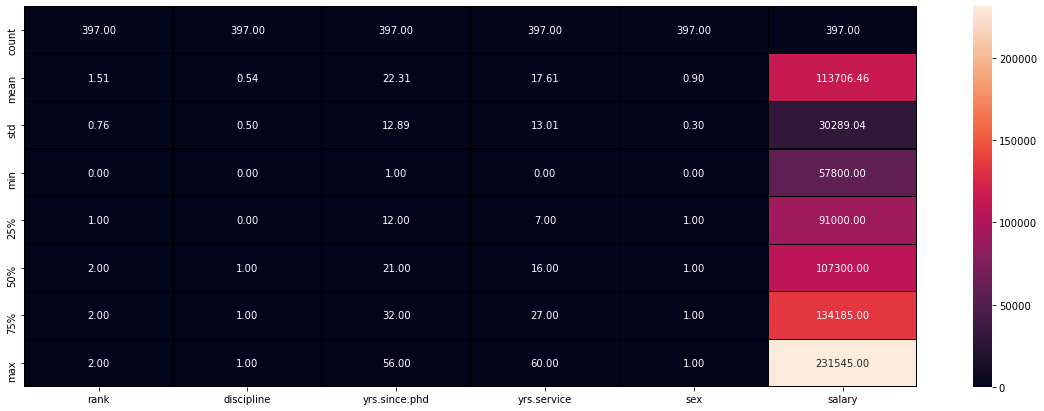

In [23]:
# heat map for describe function
plt.figure(figsize=(20,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

# Correlation of columns with target columns:

In [24]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

values less than 0.65 is less correlated and the values greater than or equan than 0.65 is highly correlated.  so all columns are normal correlation 

<AxesSubplot:>

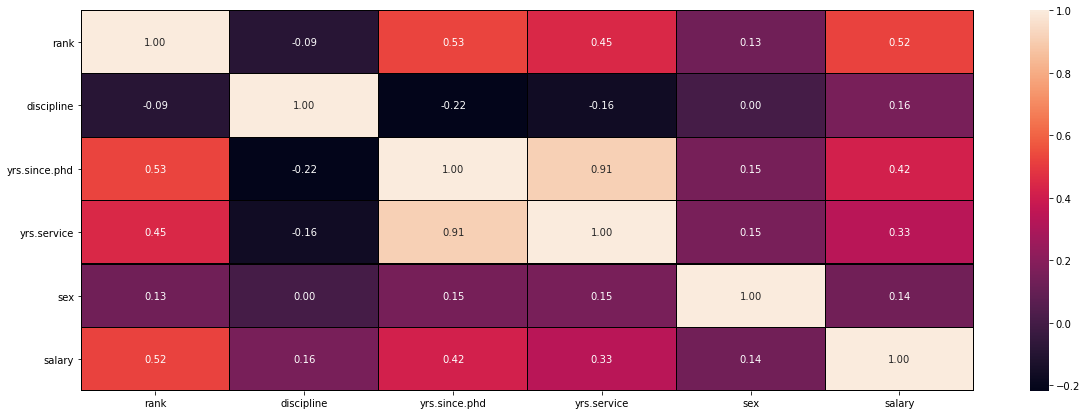

In [25]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

In [28]:
df.skew().sort_values(ascending=False)

salary           0.714568
yrs.service      0.650569
yrs.since.phd    0.300880
discipline      -0.177684
rank            -1.151164
sex             -2.709958
dtype: float64

# Outliesrs Check

In [56]:
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

<AxesSubplot:>

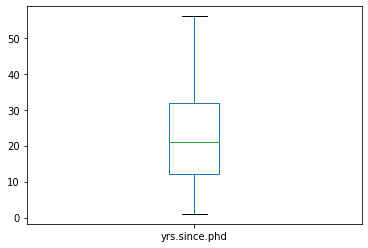

In [57]:
df['yrs.since.phd'].plot.box()

<AxesSubplot:>

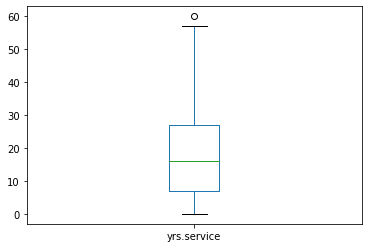

In [58]:
df['yrs.service'].plot.box()

# Outlier Removal

In [59]:
df.shape

(397, 6)

In [60]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [61]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [62]:
# after removing outliers shape of data
df_new_z.shape

(354, 6)

# Check the data Distribtion among all the columns

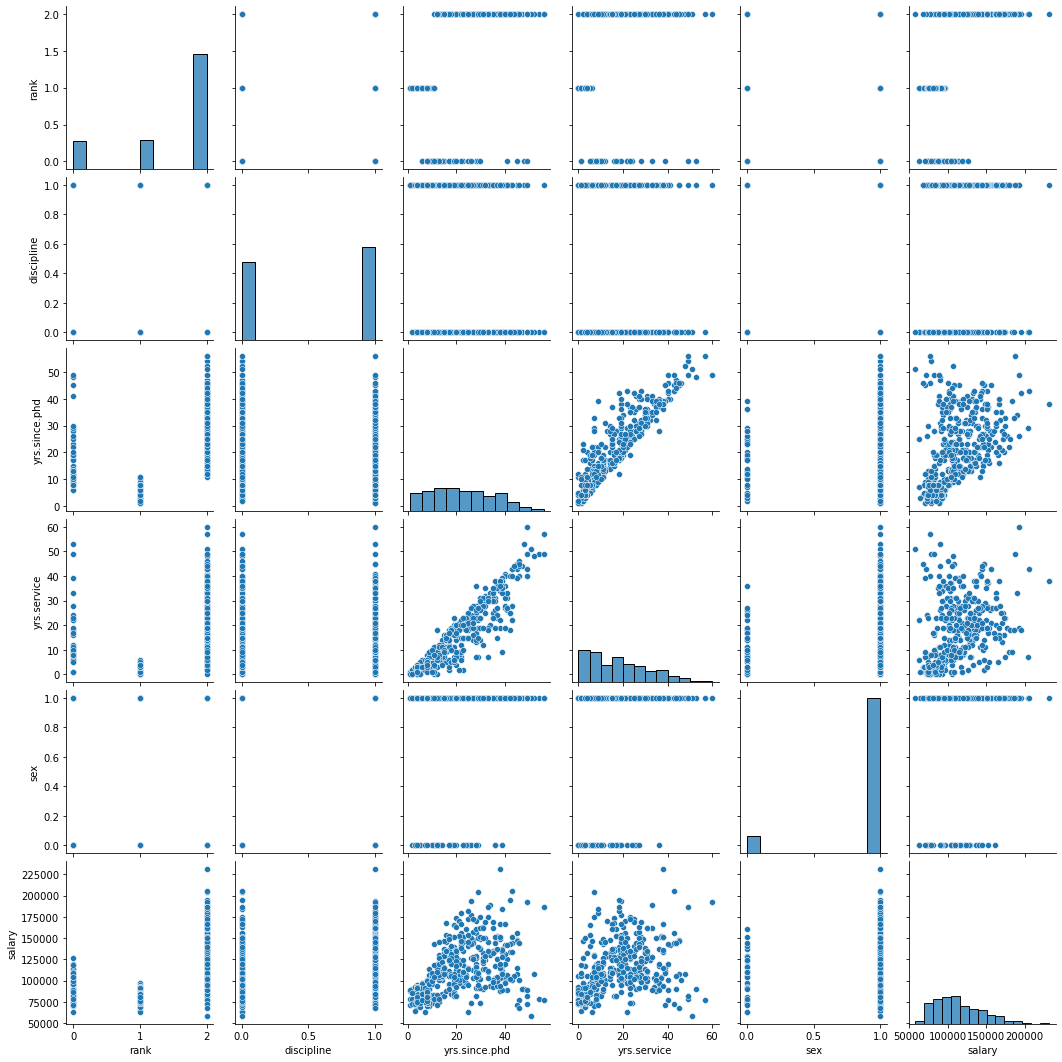

In [73]:
sns.pairplot(df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

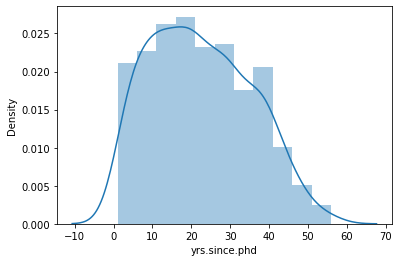

In [66]:
sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

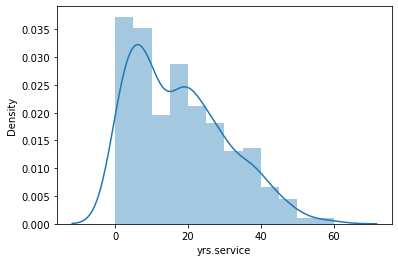

In [67]:
sns.distplot(df['yrs.service'])

Little skewness is present 

# Preprocessing

In [29]:
x=df.drop('salary',axis=1)
y=df['salary']

In [30]:
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2.0,1.0,19,18,1.0
1,2.0,1.0,20,16,1.0
2,1.0,1.0,4,3,1.0
3,2.0,1.0,45,39,1.0
4,2.0,1.0,40,41,1.0
...,...,...,...,...,...
392,2.0,0.0,33,30,1.0
393,2.0,0.0,31,19,1.0
394,2.0,0.0,42,25,1.0
395,2.0,0.0,25,15,1.0


In [31]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [32]:
x.shape

(397, 5)

In [34]:
y.shape

(397,)

In [62]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [66]:
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print( "At random state", {i}, "the training accuracy is:-", {r2_score(y_train,pred_train)})
    print( 'At random state', {i}, 'the testing accuracy is:-',  {r2_score(y_test,pred_test)})
    print("\n")

At random state {0} the training accuracy is:- {0.3604245854198438}
At random state {0} the testing accuracy is:- {0.4163364187662941}


At random state {1} the training accuracy is:- {0.3604245854198438}
At random state {1} the testing accuracy is:- {0.4163364187662941}


At random state {2} the training accuracy is:- {0.3604245854198438}
At random state {2} the testing accuracy is:- {0.4163364187662941}


At random state {3} the training accuracy is:- {0.3604245854198438}
At random state {3} the testing accuracy is:- {0.4163364187662941}


At random state {4} the training accuracy is:- {0.3604245854198438}
At random state {4} the testing accuracy is:- {0.4163364187662941}


At random state {5} the training accuracy is:- {0.3604245854198438}
At random state {5} the testing accuracy is:- {0.4163364187662941}


At random state {6} the training accuracy is:- {0.3604245854198438}
At random state {6} the testing accuracy is:- {0.4163364187662941}


At random state {7} the training accuracy

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

#Train the model
lr.fit(x_train,y_train)
    

LinearRegression()

In [69]:
pred_test=lr.predict(x_test)

In [70]:
print(r2_score(y_test,pred_test))

0.3439703329785656


# Cross-Validation of Model:

In [72]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    
    # avrage of the all the iteration
    cv_mean=cv_score.mean()
   
    print('At cross fold',(j),'the cv score is',(cv_mean),'the accuracy score of traing is',(Train_accuracy),'and accuracy of testing is',(Test_accuracy))
    print("\n")

At cross fold 2 the cv score is 0.32708011674065113 the accuracy score of traing is -0.48920140471764695 and accuracy of testing is 0.3439703329785656


At cross fold 3 the cv score is 0.3203328673059879 the accuracy score of traing is -0.48920140471764695 and accuracy of testing is 0.3439703329785656


At cross fold 4 the cv score is 0.32181966937683587 the accuracy score of traing is -0.48920140471764695 and accuracy of testing is 0.3439703329785656


At cross fold 5 the cv score is 0.29569928663871736 the accuracy score of traing is -0.48920140471764695 and accuracy of testing is 0.3439703329785656


At cross fold 6 the cv score is 0.3309634183929555 the accuracy score of traing is -0.48920140471764695 and accuracy of testing is 0.3439703329785656


At cross fold 7 the cv score is 0.3257704419996535 the accuracy score of traing is -0.48920140471764695 and accuracy of testing is 0.3439703329785656


At cross fold 8 the cv score is 0.3310060584513581 the accuracy score of traing is -0

Since the number of the fold dont have such impact on the accuracy and av_score. so cv=8 is selected

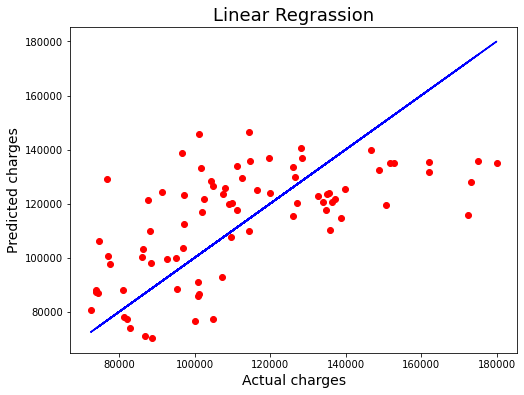

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual charges", fontsize=14)
plt.ylabel("Predicted charges", fontsize=14)
plt.title("Linear Regrassion", fontsize=18)
plt.savefig('lr.png')
plt.show()

In [79]:
#GridSearchCV is hyper parameter tunig algorithm which is used to maximized the performence of model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


best parameter is 10 so we will use this in our model

In [80]:
ls==Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

37.67666653763994

In [82]:
pred_ls=ls.predict(x_test)

In [83]:
lss=r2_score(y_test,pred_ls)
lss*100

34.396037220932286

In [84]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],
           'max_features':['ato','sqrt','log2']}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'criterion': 'mae', 'max_features': 'sqrt'}


In [85]:
rf=RandomForestRegressor(criterion='mae',max_features='sqrt')
rf.fit(x_train,y_train)
rf_score=(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 Score', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=8)
    
# avrage of the all the iteration
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score 35.43057763437246
Cross Val Score: 37.04249394185199


In [ ]:
so we ae getting 37% accurecy of Cross Vallidation model we will consider it as a ur best score.